In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_excel('/content/Supplementary data 3.xlsx')

In [ ]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

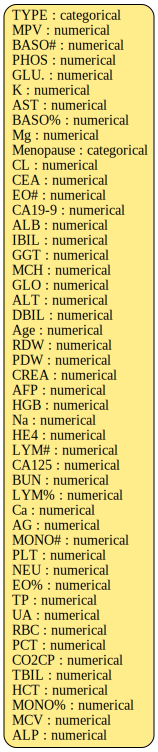

In [ ]:
metadata.visualize()

In [ ]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(df)

synthetic_data = synthesizer.sample(num_rows=2000)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
synthesizer = CTGANSynthesizer(
    metadata, # required
    enforce_rounding=False,
    epochs=500,
    verbose=True
)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


In [ ]:
synthetic_data.to_csv('synthetic_data_ctgan.csv', index=False)

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 49/49 [00:00<00:00, 911.91it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 149.25it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    df,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 49/49 [00:00<00:00, 299.39it/s]|
Column Shapes Score: 69.47%

(2/2) Evaluating Column Pair Trends: |██████████| 1176/1176 [00:09<00:00, 123.83it/s]|
Column Pair Trends Score: 91.57%

Overall Score (Average): 80.52%



In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,TYPE,TVComplement,0.952223
1,MPV,KSComplement,0.596947
2,BASO#,KSComplement,0.848681
3,PHOS,KSComplement,0.843851
4,GLU.,KSComplement,0.717394
5,K,KSComplement,0.713670
6,AST,KSComplement,0.861426
7,BASO%,KSComplement,0.569404
8,Mg,KSComplement,0.778628
9,Menopause,TVComplement,0.951479


In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='TYPE',
    metadata=metadata
)

fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('/content/synthetic_data.csv')
# Select features (excluding the 'SUBJECT_ID' and the target 'TYPE')
X = df2.drop(columns=['TYPE'])
y = df2['TYPE']

# Standardize the features for better performance in logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Let's inspect the shapes to make sure everything looks correct
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 48), (400, 48), (1600,), (400,))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model using the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7625


In [ ]:
# Get the feature coefficients (weights)
coefficients = log_reg.coef_[0]

# Function to calculate the sigmoid of a value
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to calculate the summary for each data point
def generate_summary(X_test, coefficients, feature_names, model):
    results = []

    # Compute the linear model (dot product of X and coefficients) and the probabilities
    linear_model = np.dot(X_test, coefficients) + model.intercept_[0]
    probabilities = sigmoid(linear_model)

    # Loop through each data point in the test set
    for idx, (sample, prob) in enumerate(zip(X_test, probabilities)):
        # Calculate contributions for all features for this sample
        contributions = sample * coefficients
        absolute_contributions = np.abs(contributions)

        # Find the most important feature (the one with the highest absolute contribution)
        most_important_feature_idx = np.argmax(absolute_contributions)
        most_important_feature = feature_names[most_important_feature_idx]
        contribution_value = contributions[most_important_feature_idx]

        # Add the summary for this data point
        results.append({
            'Data Point': idx + 1,
            'Most Important Feature': most_important_feature,
            'Contribution Value': contribution_value,
            'Predicted Probability (P(y=1))': prob
        })

    # Convert results to a DataFrame
    summary_df = pd.DataFrame(results)

    return summary_df

# Generate the summary for all test samples
summary_table = generate_summary(X_test, coefficients, X.columns, log_reg)

# Display the first few rows of the summary
summary_table.head(20)  # Displaying the top 20 rows for brevity

,Data Point,Most Important Feature,Contribution Value,Predicted Probability (P(y=1))
0,1,ALP,0.267911,0.468966
1,2,MCV,0.415816,0.653852
2,3,ALB,0.752217,0.824006
3,4,AFP,-0.550268,0.518398
4,5,ALB,-0.420188,0.234292
5,6,MCV,-0.385579,0.249827
6,7,AG,-0.353993,0.287245
7,8,MCV,0.429753,0.475863
8,9,BUN,-0.393167,0.289495
9,10,MCV,-0.566764,0.147821


In [ ]:
summary_table['Most Important Feature'].value_counts()

,count
Most Important Feature,
ALB,91
MCV,90
DBIL,30
AG,29
CREA,20
AFP,18
BUN,13
Menopause,13
MONO%,13


FEATURE EXTRACTED INTO AN ARRAY

In [ ]:
# Step 1: Extract the list of important features from the summary table
important_features = summary_table['Most Important Feature'].unique()

# Step 2: Filter the dataset to only include important features
features = [feature for feature in important_features if feature in df2.columns]

# Step 3: Add the important features to X
X = df2[features].values

print(f"Updated X now includes only important features: {features}")


# Step 4: Include the target label
selected_features_df = df2[features + ['TYPE']]  # Assuming 'TYPE' is the target column

# Step 5: Save the selected features to a CSV file
selected_features_df.to_csv('sel_features.csv', index=False)

print("Selected features and labels saved to 'sel_features.csv'.")


Updated X now includes only important features: ['ALP', 'MCV', 'ALB', 'AFP', 'AG', 'BUN', 'CA19-9', 'DBIL', 'RBC', 'CREA', 'MPV', 'AST', 'TBIL', 'MONO%', 'Menopause', 'CEA', 'HCT', 'LYM%', 'Ca', 'PCT', 'Na', 'UA', 'MONO#', 'GGT', 'RDW']
Selected features and labels saved to 'sel_features.csv'.


SAINT

In [ ]:
import torch

Columns successfully dropped and features/target separated.
Epoch 10/10, Loss: 0.3690, Train Acc: 0.9619, Test Acc: 0.9675
Final Test Accuracy: 0.9675

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       245
           1       0.96      0.95      0.96       155

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


Confusion Matrix:
[[239   6]
 [  7 148]]

ROC-AUC Score: 0.9960


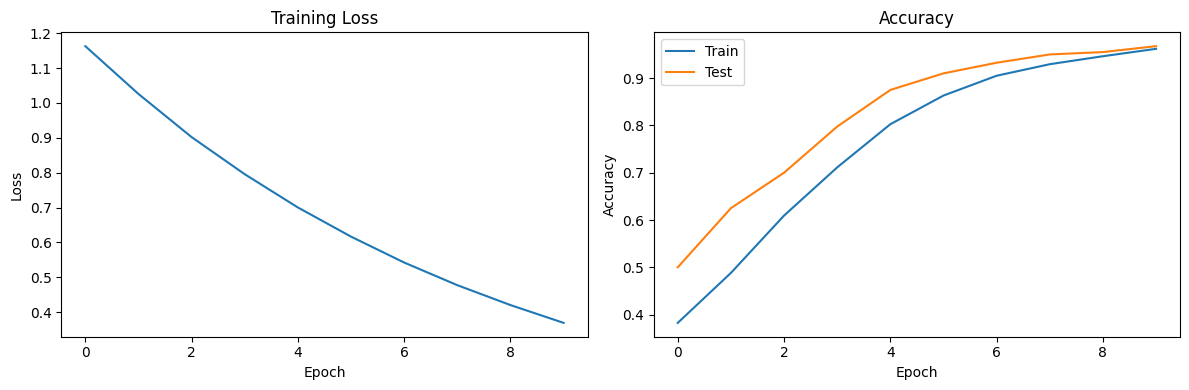

In [ ]:
# Load the synthetic data from CSV and prepare it for the SAINT model
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load the data
file_path = '/content/sel_features.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.values
y = data['TYPE'].values

print("Columns successfully dropped and features/target separated.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=3):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(
            embed_dim=hidden_dim,
            num_heads=num_heads,
            batch_first=True
        )
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    # Calculate test accuracy
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Classification Metrics (From Code 1)
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test.numpy(), predicted.numpy())
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute ROC-AUC Score (for binary classification)
if len(set(y_test.numpy())) == 2:  # Ensure binary classification
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()  # Get probabilities for class 1
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

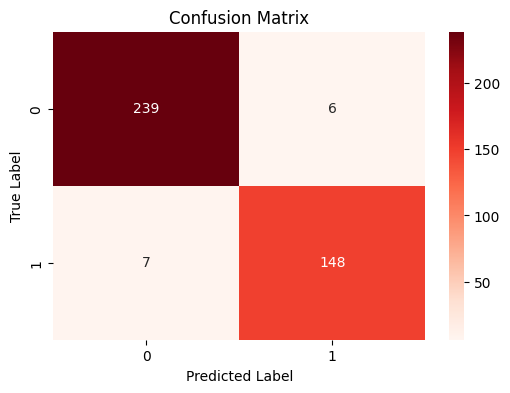

In [ ]:
import seaborn as sns

# Plot Confusion Matrix as a Table
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=set(y_test.numpy()), yticklabels=set(y_test.numpy()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


BORUTA + FCNN

In [2]:
#BORUTA + SAINT
!pip install boruta

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_csv("/content/synthetic_data_ctgan.csv")
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Random Forest and Boruta
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42, max_iter=100)

# Fit Boruta
boruta.fit(X_scaled, y.values)

# Select features
selected_features = X.columns[boruta.support_].tolist()
X_selected = df[selected_features]
X_selected['TYPE'] = y

# Save to CSV
X_selected.to_csv('sel_features_ctgan.csv', index=False)
print(f"Selected {len(selected_features)} features saved to 'sel_features.csv'.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.5 MB/s eta 0:00:00
Selected 14 features saved to 'sel_features.csv'.


<ipython-input-2-6d7b2d2f5353>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['TYPE'] = y


Epoch 10/10, Loss: 0.1894, Train Acc: 0.9700, Test Acc: 0.9775

Final Test Accuracy: 0.9775

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       240
           1       0.97      0.97      0.97       160

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400


Confusion Matrix:
[[235   5]
 [  4 156]]

ROC-AUC Score: 0.9983


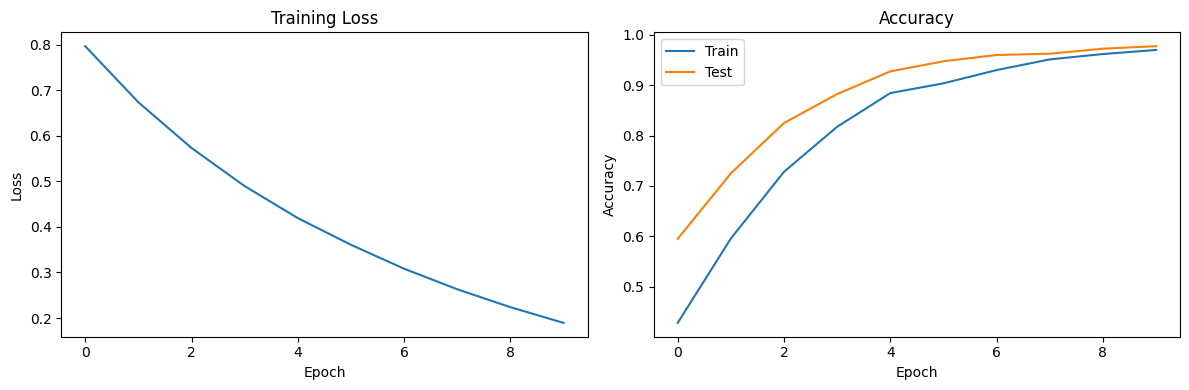

In [2]:
# Load the synthetic data from CSV and prepare it for the SAINT model
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load the data
file_path = '/content/sel_features_ctgan.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.values
y = data['TYPE'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=3):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    # Calculate test accuracy
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

# Classification Metrics (From Code 1)
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test.numpy(), predicted.numpy())
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute ROC-AUC Score (for binary classification)
if len(set(y_test.numpy())) == 2:  # Ensure binary classification
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()  # Get probabilities for class 1
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



=== Feature Scores (Mutual Information) ===
      Feature  MI Score
43       TBIL  0.048996
8   Menopause  0.036298
1       BASO#  0.032935
10        CEA  0.023927
20        Age  0.023904
22        PDW  0.022746
45      MONO%  0.021432
38         TP  0.021154
47        ALP  0.019903
17        GLO  0.019387
46        MCV  0.019190
26         Na  0.018619
19       DBIL  0.018340
7          Mg  0.017567
33         AG  0.016812
35        PLT  0.015207
6       BASO%  0.012822
0         MPV  0.012783
21        RDW  0.011850
9          CL  0.011385
34      MONO#  0.010728
13        ALB  0.010292
36        NEU  0.006249
25        HGB  0.004795
30        BUN  0.003285
23       CREA  0.002788
5         AST  0.002476
44        HCT  0.000299
18        ALT  0.000045
41        PCT  0.000000
42      CO2CP  0.000000
40        RBC  0.000000
39         UA  0.000000
37        EO%  0.000000
3        GLU.  0.000000
2        PHOS  0.000000
4           K  0.000000
11        EO#  0.000000
16        MCH  0.00

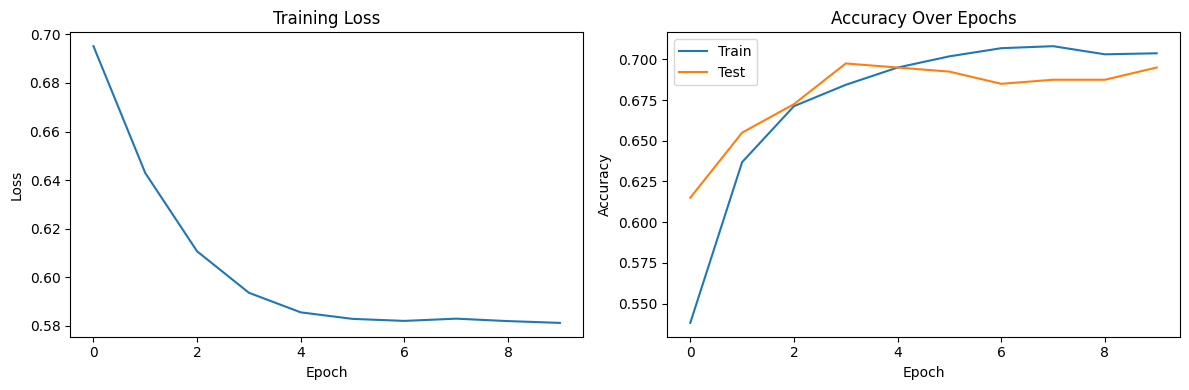

In [1]:
#MI+SAINT
# Step 1: MI Feature Selection
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your data
df = pd.read_csv('/content/synthetic_data_ctgan.csv')  # <-- Update this path

# Separate features and target
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Ensure column names are strings
X.columns = X.columns.astype(str)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mutual Information scores
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)

# Display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Feature Scores (Mutual Information) ===")
print(feature_scores)

# Select top 10 features
top_features = feature_scores['Feature'][:10].tolist()
print("\n=== Top 10 Selected Features ===")
print(top_features)

X_selected = df[top_features]

# Step 2: Train/Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: SAINT Model Setup
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# Define SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Final Evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\n=== Final Test Accuracy: {final_accuracy:.4f} ===")
print("\n=== Classification Report ===")
print(classification_report(y_test.numpy(), predicted.numpy()))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.numpy(), predicted.numpy()))

# ROC-AUC (binary only)
if len(set(y_test.numpy())) == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"=== ROC-AUC Score: {roc_auc:.4f} ===")

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


AdaBoost Classifier Accuracy: 0.7275
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       244
           1       0.68      0.56      0.62       156

    accuracy                           0.73       400
   macro avg       0.72      0.70      0.70       400
weighted avg       0.72      0.73      0.72       400


Confusion Matrix:
[[203  41]
 [ 68  88]]


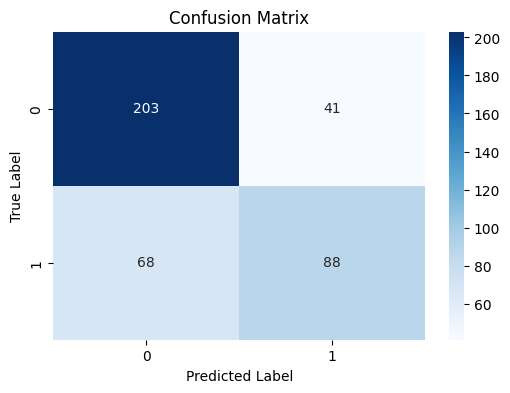

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix as a Table
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

0:	learn: 0.6603615	test: 0.6553042	best: 0.6553042 (0)	total: 1.55ms	remaining: 115ms
74:	learn: 0.3308759	test: 0.5477243	best: 0.5383316 (40)	total: 241ms	remaining: 0us

bestTest = 0.5383316379
bestIteration = 40

Shrink model to first 41 iterations.
CatBoost Classifier Accuracy: 0.7550
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       244
           1       0.74      0.58      0.65       156

    accuracy                           0.76       400
   macro avg       0.75      0.72      0.73       400
weighted avg       0.75      0.76      0.75       400


Confusion Matrix:
[[212  32]
 [ 66  90]]


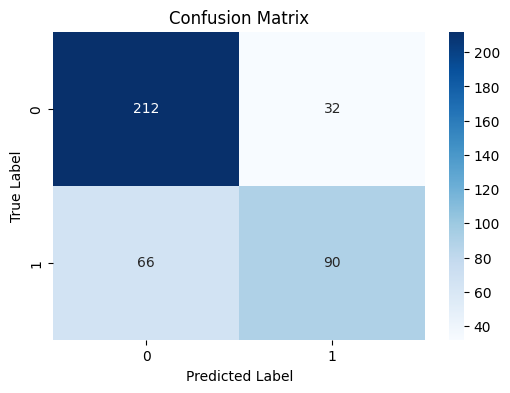

In [ ]:
#!pip install catboost

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=75, learning_rate=0.25, depth=6, loss_function='Logloss', verbose=100, random_seed=42)
catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=100)

# Make predictions
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix as a Table
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/75


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5516 - loss: 0.8647 - val_accuracy: 0.6100 - val_loss: 0.8294
Epoch 2/75
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5903 - loss: 0.7594 - val_accuracy: 0.6225 - val_loss: 0.6558
Epoch 3/75
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6015 - loss: 0.7615 - val_accuracy: 0.6200 - val_loss: 0.6589
Epoch 4/75
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6043 - loss: 0.7350 - val_accuracy: 0.6375 - val_loss: 0.6528
Epoch 5/75
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6345 - loss: 0.6803 - val_accuracy: 0.6350 - val_loss: 0.6423
Epoch 6/75
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6461 - loss: 0.6725 - val_accuracy: 0.6400 - val_loss: 0.6394
Epoch 7/75
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6392 - loss: 0.6512 - val_accuracy: 0.6700 - val_loss: 0.6253
Epoch 8/75
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6274 - loss: 0.6573 - val_accuracy: 0.6675 - val_loss: 0.6262
E

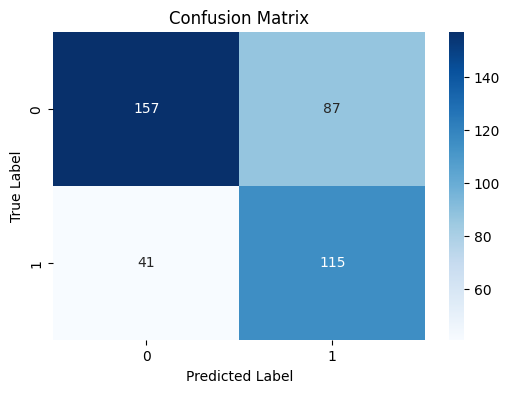

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Convert labels to categorical if needed
num_classes = len(np.unique(y_train))
# Removed the unnecessary to_categorical for binary classification
# if num_classes > 2:
#    y_train = keras.utils.to_categorical(y_train, num_classes)
#    y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the FCNN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # Changed to sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Changed to binary_crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Predictions for binary classification

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"FCNN Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix as a Table
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**MI** + FCNN


✅ Best Alpha: 0.0059

=== Feature Scores ===
      Feature  Coefficient
8   Menopause     0.081030
43       TBIL     0.058202
22        PDW     0.043630
32         Ca     0.041030
1       BASO#     0.038476
42      CO2CP     0.025044
16        MCH     0.024229
13        ALB     0.020620
6       BASO%     0.020355
28       LYM#     0.015728
25        HGB     0.009172
10        CEA     0.008321
0         MPV     0.003906
24        AFP     0.003151
39         UA     0.001797
30        BUN     0.000235
23       CREA    -0.000000
35        PLT    -0.000000
41        PCT     0.000000
27        HE4    -0.000000
3        GLU.    -0.000000
37        EO%    -0.000000
9          CL    -0.000000
31       LYM%    -0.000000
18        ALT    -0.000000
12     CA19-9     0.000000
21        RDW    -0.004557
44        HCT    -0.004825
4           K    -0.006762
29      CA125    -0.007272
7          Mg    -0.007321
46        MCV    -0.008837
5         AST    -0.009434
40        RBC    -0.013916
2        

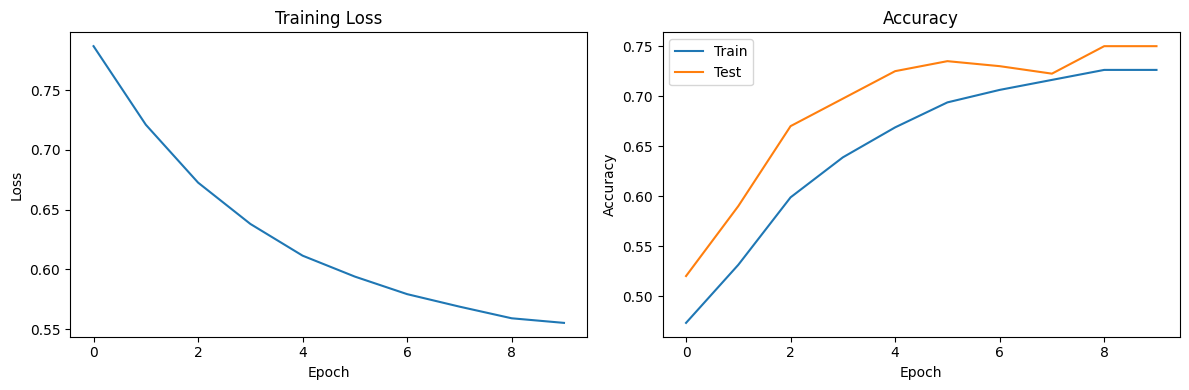

In [3]:
# --- LASSO + SAINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load your dataset
df = pd.read_csv('/content/synthetic_data_ctgan.csv')  # <-- Change path
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply LASSO with CV
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=42)
lasso_cv.fit(X_train_fs, y_train_fs)

best_alpha = lasso_cv.alpha_
print(f"\n✅ Best Alpha: {best_alpha:.4f}")

lasso = Lasso(alpha=best_alpha, random_state=42)
lasso.fit(X_train_fs, y_train_fs)

# Feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n=== Feature Scores ===")
print(feature_scores)

# Select non-zero features
selected_features = feature_scores[feature_scores['Coefficient'] != 0]['Feature'].tolist()
print(f"\n✅ Selected Features ({len(selected_features)}):\n{selected_features}")

# Filter dataframe to selected features
X_selected = df[selected_features]

# --- SAINT Classification ---
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Train-test split on selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        return self.classifier(x)

# Initialize model
num_classes = len(np.unique(y))  # supports multi-class
model = SimpleSAINT(input_dim=X_train.shape[1], hidden_dim=64, num_heads=4, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses, train_accuracies, test_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, pred_train = torch.max(outputs, 1)
    train_acc = accuracy_score(y_train.numpy(), pred_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, pred_test = torch.max(test_outputs, 1)
        test_acc = accuracy_score(y_test.numpy(), pred_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Final metrics
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, final_pred = torch.max(final_outputs, 1)

print(f"\n✅ Final Test Accuracy: {accuracy_score(y_test.numpy(), final_pred.numpy()):.4f}")
print("\n=== Classification Report ===")
print(classification_report(y_test.numpy(), final_pred.numpy()))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.numpy(), final_pred.numpy()))

# ROC-AUC only for binary
if num_classes == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    auc_score = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {auc_score:.4f}")

# --- Plotting ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ELASTIC NET + FCNN

Best Alpha: 0.0534, Best L1 Ratio: 0.10
Epoch 1/10, Loss: 0.7911, Train Acc: 0.4487, Test Acc: 0.5325
Epoch 2/10, Loss: 0.7239, Train Acc: 0.5244, Test Acc: 0.5725
Epoch 3/10, Loss: 0.6738, Train Acc: 0.5887, Test Acc: 0.6250
Epoch 4/10, Loss: 0.6351, Train Acc: 0.6375, Test Acc: 0.6525
Epoch 5/10, Loss: 0.6065, Train Acc: 0.6794, Test Acc: 0.6650
Epoch 6/10, Loss: 0.5855, Train Acc: 0.6944, Test Acc: 0.6900
Epoch 7/10, Loss: 0.5715, Train Acc: 0.7125, Test Acc: 0.6850
Epoch 8/10, Loss: 0.5590, Train Acc: 0.7219, Test Acc: 0.7025
Epoch 9/10, Loss: 0.5509, Train Acc: 0.7256, Test Acc: 0.7150
Epoch 10/10, Loss: 0.5447, Train Acc: 0.7275, Test Acc: 0.7050

Final Test Accuracy: 0.7050

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       240
           1       0.64      0.59      0.61       160

    accuracy                           0.70       400
   macro avg       0.69      0.69      0.69       400
weighted avg  

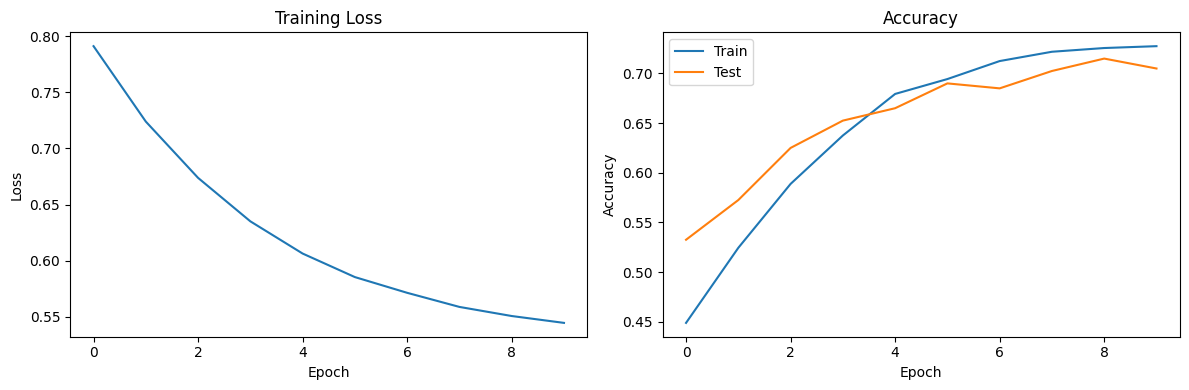

In [5]:
# ELASTICNET + SAINT
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load your dataframe
df = pd.read_csv("/content/synthetic_data_ctgan.csv")

# Separate features and target variable
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ElasticNetCV for feature selection
elasticnet_cv = ElasticNetCV(
    alphas=np.logspace(-4, 1, 100),
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0],
    cv=5,
    random_state=42
)
elasticnet_cv.fit(X_train_full, y_train_full)

# Best hyperparameters
best_alpha = elasticnet_cv.alpha_
best_l1_ratio = elasticnet_cv.l1_ratio_
print(f"Best Alpha: {best_alpha:.4f}, Best L1 Ratio: {best_l1_ratio:.2f}")

# Fit final ElasticNet model
elasticnet = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
elasticnet.fit(X_train_full, y_train_full)

# Get non-zero coefficient features
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': elasticnet.coef_
}).sort_values(by='Coefficient', ascending=False)
selected_features = feature_scores[feature_scores['Coefficient'] != 0]['Feature'].tolist()
X_selected = df[selected_features]

# Save selected features (optional)
# X_selected.to_csv("sel_features.csv", index=False)

# Recreate X and y with selected features
X = X_selected.values
y = df['TYPE'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.numpy(), predicted.numpy()))

# ROC-AUC Score for binary
if len(set(y_test.numpy())) == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Columns successfully dropped and features/target separated.
Estimators: 10, Train Acc: 0.6669, Test Acc: 0.6475
Estimators: 20, Train Acc: 0.6819, Test Acc: 0.6550
Estimators: 30, Train Acc: 0.7081, Test Acc: 0.6750
Estimators: 40, Train Acc: 0.7113, Test Acc: 0.6900
Estimators: 50, Train Acc: 0.7144, Test Acc: 0.6900
Estimators: 60, Train Acc: 0.7262, Test Acc: 0.6975
Estimators: 70, Train Acc: 0.7375, Test Acc: 0.6950
Estimators: 80, Train Acc: 0.7388, Test Acc: 0.7000
Estimators: 90, Train Acc: 0.7431, Test Acc: 0.6975
Estimators: 100, Train Acc: 0.7394, Test Acc: 0.6950
Estimators: 110, Train Acc: 0.7431, Test Acc: 0.7000
Estimators: 120, Train Acc: 0.7444, Test Acc: 0.6975
Estimators: 130, Train Acc: 0.7469, Test Acc: 0.6975
Estimators: 140, Train Acc: 0.7438, Test Acc: 0.6975
Estimators: 150, Train Acc: 0.7462, Test Acc: 0.6900
Final Test Accuracy: 0.6900


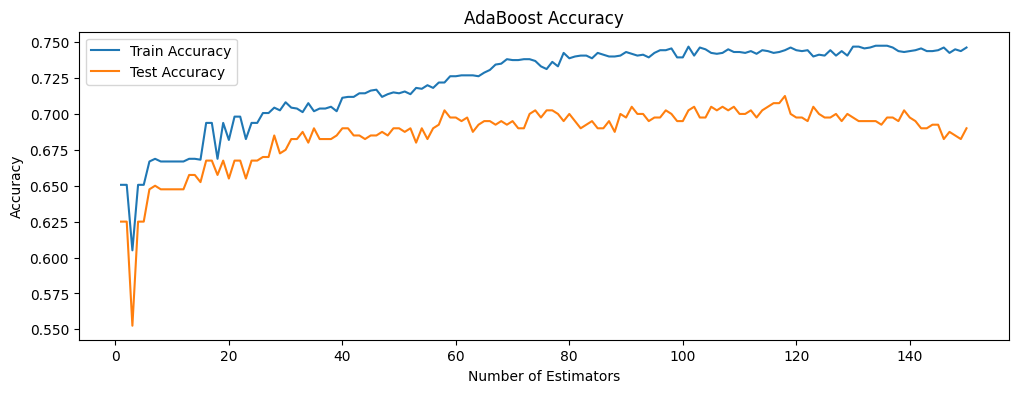

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/synthetic_data_ctgan.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.drop(columns=['TYPE'])
y = data['TYPE'].values

print("Columns successfully dropped and features/target separated.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the AdaBoost classifier with a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
model = AdaBoostClassifier( n_estimators=150, learning_rate=0.1, random_state=42)

# Training loop
train_accuracies = []
test_accuracies = []

for i in range(1, 151):
    model.n_estimators = i  # Increase the number of estimators incrementally
    model.fit(X_train, y_train)

    # Calculate training accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train))

    # Calculate test accuracy
    test_acc = accuracy_score(y_test, model.predict(X_test))

    # Store metrics
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if i % 10 == 0:
        print(f"Estimators: {i}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
final_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))

# Accuracy curves
plt.plot(range(1, 151), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 151), test_accuracies, label='Test Accuracy')
plt.title('AdaBoost Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
